## En este ejercicio vamos a clusterizar con kmeans ##

 **Aprendizaje no supervisado** es aquel en el que no sabemos nada sobre los datos.

 **Clusterizar** es hallar grupos de clases de iguales, dentro de un dataset.
 
  <div class="alert alert-block alert-info">
 Para clusterizar, se suele usar el algoritmo del kmeans, aunque este necesita que se le diga el nº de clusters.<br>
 Para calcular el nº de cluster se suele emplear la técnica de la silueta, que calcula la máxima separación entre cluster.
 </div>

## Cargamos el dataset ##

In [1]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import html5lib
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn                  import svm ,  metrics
from sklearn.metrics          import mean_squared_error

#df = pd.read_html("http://www.mundodeportivo.com/resultados/futbol/laliga/clasificacion.html")[0]


df = pd.read_csv("datasets/equipos.csv")

df

/Users/jaimevalero/miniconda3/envs/flask/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS
0,Barcelona,37,27,9,1,98,29,69,90
1,Atlético Madrid,37,23,9,5,56,20,36,78
2,Real Madrid,37,22,9,6,92,42,50,75
3,Valencia,37,21,7,9,63,37,26,70
4,Villarreal,37,18,6,13,55,48,7,60
5,Betis,37,18,6,13,58,58,0,60
6,Sevilla,37,16,7,14,48,58,-10,55
7,Getafe,37,14,10,13,41,33,8,52
8,Eibar,37,14,8,15,42,48,-6,50
9,Real Sociedad,37,14,7,16,66,58,8,49


In [2]:
# Eliminamos columnas no deseadas
df.index = df.Equipo
try:
  del df["Equipo"]
  del df["PJ"]
except: pass

df

,PG,PE,PP,GF,GC,DIF,PTS
Equipo,,,,,,,
Barcelona,27,9,1,98,29,69,90
Atlético Madrid,23,9,5,56,20,36,78
Real Madrid,22,9,6,92,42,50,75
Valencia,21,7,9,63,37,26,70
Villarreal,18,6,13,55,48,7,60
Betis,18,6,13,58,58,0,60
Sevilla,16,7,14,48,58,-10,55
Getafe,14,10,13,41,33,8,52
Eibar,14,8,15,42,48,-6,50


In [3]:
# Pasamos a arrays de numpy
X = df[[ "PG","PE","PP","GF","GC","DIF","PTS"]].values



## Usamos el método de la silueta, en un bucle for, y observamos los resultados ##

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

X = df[[ "PG","PE","PP","GF","GC","DIF","PTS"]].values
scores = []
values = np.arange(2, 10)
    
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    #
    score = metrics.silhouette_score(X, kmeans.labels_,
                   metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
    scores.append(score)
    
    


Number of clusters = 2
Silhouette score = 0.5625934337882015

Number of clusters = 3
Silhouette score = 0.5370124739434602

Number of clusters = 4
Silhouette score = 0.5159106847016395

Number of clusters = 5
Silhouette score = 0.37886129440833355

Number of clusters = 6
Silhouette score = 0.36435448808866855

Number of clusters = 7
Silhouette score = 0.2690657856188852

Number of clusters = 8
Silhouette score = 0.2700687818097254

Number of clusters = 9
Silhouette score = 0.23098196152964645



Optimal number of clusters = 2


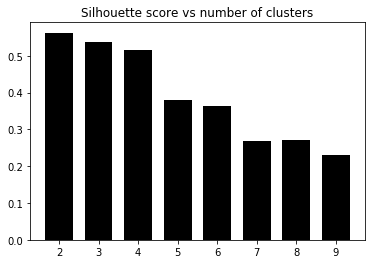

In [5]:

# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

#Extract the best score and the corresponding value for the number of clusters:
# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

## El método de la silueta sugiere 2, 3 ó 4 clusters.## 

Nosotros vamos a usar 4, para que el ejericicio sea parecido a los anteriores.

Usamos el modelo kmeans, y este predice los valores.

Los **centroides** son el punto medio de cada cluster.

<div class="alert alert-block alert-info">
Vendrían a ser como el elemento promedio, para ese cluster.
<div>

In [6]:
num_clusters=4
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
# Train the K-Means model with the input data:
# Train the KMeans clustering model

kmeans.fit(X)
labels = kmeans.fit(X).labels_
print(labels)


[1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3]


In [7]:



centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = [ "PG","PE","PP","GF","GC","DIF","PTS"]
print("Los valores de los centroides son")
centroids.sort_values("PTS")

Los valores de los centroides son


,PG,PE,PP,GF,GC,DIF,PTS
3,5.333333,7.666667,24.000000,28.000000,68.666667,-40.666667,23.666667
0,13.615385,8.538462,14.846154,46.307692,50.846154,-4.538462,49.384615
2,22.000000,8.000000,7.000000,59.500000,28.500000,31.000000,74.000000
1,24.500000,9.000000,3.500000,95.000000,35.500000,59.500000,82.500000


Vemos por la tabla anterior, que el kmeans reconoce un centroide con un equipo fuerte, y luego va paulatinamente bajando la fuerza de los equipos.

Pintamos el gráfico, con los resultados del clasificador.
Para eso: 
    
 - Disminuimos el nº de dimensiones usando PCA a 2, para poder pintar un gráfico en dos dimensiones.
 - Usamos el kmeans como clasificador, para colorear las regiones del gráfico.
 - Pintamos los centroides, como estrellas.
    

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Primero definimos las variables X e Y, como arrays de numpy
df_sinpuntos = df

df["auto_labels"] = labels 
X = df.values[:,0:7]

Y = df.values[:,7]

le = LabelEncoder()
y2 = le.fit_transform(Y)
y = y2

print(X,y)

###### Generamos un nuevo dataframe con sol dos componentes.
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(X)
print(X_pca_2c.shape)


[[ 27   9   1  98  29  69  90]
 [ 23   9   5  56  20  36  78]
 [ 22   9   6  92  42  50  75]
 [ 21   7   9  63  37  26  70]
 [ 18   6  13  55  48   7  60]
 [ 18   6  13  58  58   0  60]
 [ 16   7  14  48  58 -10  55]
 [ 14  10  13  41  33   8  52]
 [ 14   8  15  42  48  -6  50]
 [ 14   7  16  66  58   8  49]
 [ 13   9  15  48  58 -10  48]
 [ 15   2  20  40  49  -9  47]
 [ 12  10  15  55  58  -3  46]
 [ 11  13  13  35  42  -7  46]
 [ 11  13  13  42  54 -12  46]
 [ 10  13  14  41  48  -7  43]
 [ 11   7  19  31  49 -18  40]
 [  6  11  20  37  74 -37  29]
 [  5   7  25  23  72 -49  22]
 [  5   5  27  24  60 -36  20]] [1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3]
(20, 2)


In [9]:
# Generamos un nuevo clasificador, sobre el dataframe de dos dimensiones
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X_pca_2c)

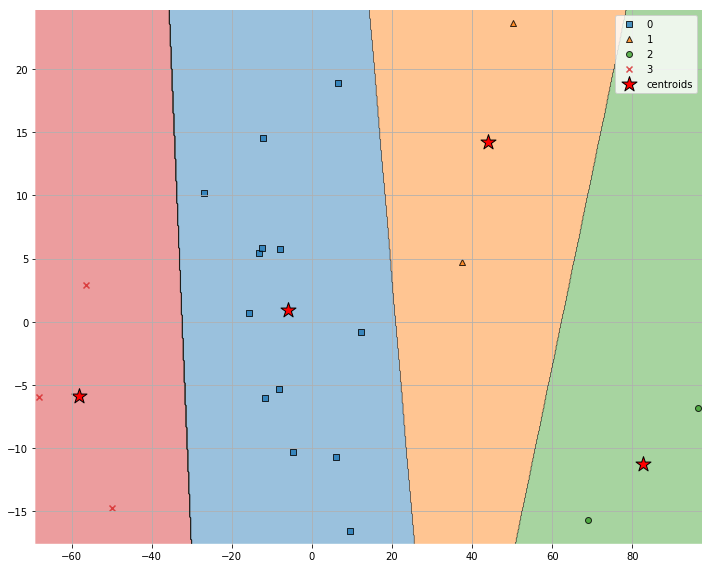

In [10]:
from mlxtend.plotting import plot_decision_regions





fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X_pca_2c, y=y_km, clf=km)

# Pintamos los centroides
fig = plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

## Conclusión ##

El algoritmo kmeans es una forma de clasificar un conjunto de datos, cuando no se sabe nada sobre los mismos.